<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/18Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Cross Validation


In [137]:
# numpy and pandas for manipulation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# sklearn reprocessing for dealing with categorical variables 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import  KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [138]:
df = pd.read_csv("/content/drive/MyDrive/application_train.csv")
df = df.select_dtypes('number')

In [139]:
# cleaning the dataset by filling the empty data(null)
cleaned_df = df.fillna(0)

In [140]:
#get only existing data with no missing values 
cleaned_df = cleaned_df[cleaned_df.columns[~cleaned_df.isnull().all()]]
cleaned_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,...,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.000000,0.555912,0.729567,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,0.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.000000,0.650442,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.000000,0.322738,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,0.0,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.145570,0.681632,0.000000,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,...,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,0.2898,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,3

In [141]:
cleaned_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [142]:
cleaned_df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [143]:
#Changing CNT_CHILDREN group numbers to others(6)
cleaned_df["CNT_CHILDREN"]=cleaned_df["CNT_CHILDREN"].map({11:5,8:5,
                                                           9:5,10:5,12:5,19:5,14:5,
                                                           7:5, 6:5, 5:5, 4:4, 3:3,
                                                           2:2, 1:1, 0:0})

In [144]:
#Confirmation of change of groups
cleaned_df['CNT_CHILDREN'].value_counts()

0    215371
1     61119
2     26749
3      3717
4       429
5       126
Name: CNT_CHILDREN, dtype: int64

In [145]:
# Separated them into variables
#lets check which features are important

X = cleaned_df.drop(['TARGET'], axis=1)
X = cleaned_df.drop(['SK_ID_CURR'], axis=1)
X = cleaned_df.drop(['FLAG_DOCUMENT_10'], axis=1)
X = cleaned_df.drop(['FLAG_DOCUMENT_12'], axis=1)
y = cleaned_df['TARGET']
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
#clf.feature_importances_
pd.DataFrame({'col_name': clf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)


,col_name
TARGET,9.051694e-01
EXT_SOURCE_2,8.532749e-03
EXT_SOURCE_3,7.571422e-03
DAYS_BIRTH,3.032677e-03
EXT_SOURCE_1,3.010095e-03
...,...
FLAG_DOCUMENT_7,7.913472e-06
FLAG_DOCUMENT_17,7.249181e-06
FLAG_DOCUMENT_10,2.190973e-07
FLAG_DOCUMENT_4,1.653611e-07


In [146]:
# Remove all data with zero effect
X = cleaned_df.drop(['FLAG_DOCUMENT_10'], axis=1)
X1 = X.drop(['FLAG_DOCUMENT_12'], axis=1)
X2 = X1.drop(['FLAG_MOBIL'], axis=1)
y = cleaned_df['TARGET']
clf = ExtraTreesClassifier()
clf = clf.fit(X2, y)
#clf.feature_importances_
pd.DataFrame({'col_name': clf.feature_importances_}, index=X2.columns).sort_values(by='col_name', ascending=False)


,col_name
TARGET,9.055716e-01
EXT_SOURCE_2,9.195832e-03
EXT_SOURCE_3,6.503956e-03
EXT_SOURCE_1,3.396063e-03
DAYS_BIRTH,3.031249e-03
...,...
FLAG_DOCUMENT_2,2.840254e-05
FLAG_DOCUMENT_15,2.747891e-05
FLAG_DOCUMENT_7,1.409862e-05
FLAG_DOCUMENT_17,7.607985e-06


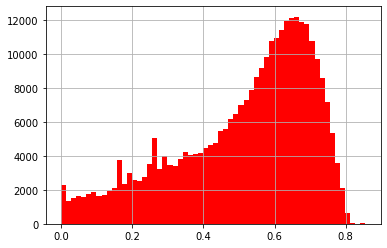

In [147]:
# Feature scaling check
cleaned_df['EXT_SOURCE_2'].hist(bins=60, color='r')

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(cleaned_df)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.00000000e-02],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.61398781e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.70370370e-02, 0.00000000e+00, 4.00000000e-02],
       [9.99997193e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.40740741e-02, 0.00000000e+00, 4.00000000e-02]])

In [149]:
#check for null values
X2.apply(lambda X2: sum(X2.isnull()),axis=0)

SK_ID_CURR                    0
TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 103, dtype: int64

In [150]:
# Initial Model Training(except feed forward neural network)
from sklearn.model_selection import train_test_split

train, test = train_test_split(X2, test_size = 0.3)

X_train = train.drop('TARGET',axis=1)

y_train = train['TARGET']

X_test =  test.drop('TARGET',axis=1)

y_test = test['TARGET']

In [151]:
# Train Benchmark Model (Log Regression)
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression(random_state=10)
clf0.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=10)

In [152]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 0.9186268346087975
Precision: 0.8439134718625175
Recall: 0.9186268346087975
f1_score: 0.8796866187904132


# Train other classifiers

In [153]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=10)
clf1.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [154]:
y_pred1 = clf1.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred1)
precision_rf = precision_score(y_test, y_pred1,average='weighted')
recall_rf = recall_score(y_test, y_pred1,average='weighted')
f1_rf = f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)


accuracy: 0.9186593535239664
Precision: 0.887370073596519
Recall: 0.9186593535239664
f1_score: 0.8798724166260878


In [155]:
# KFold for seperation
X2 = X2.to_numpy()
kf = KFold(n_splits=2)

In [156]:
for train_index, test_index in kf.split(X2):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X2[train_index], X2[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [153756 153757 153758 ... 307508 307509 307510] TEST: [     0      1      2 ... 153753 153754 153755]
TRAIN: [     0      1      2 ... 153753 153754 153755] TEST: [153756 153757 153758 ... 307508 307509 307510]


In [157]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [158]:
#Train benchmark model(Log Regression)
from sklearn.linear_model import LogisticRegression
clf0 = LogisticRegression(random_state=10)
clf0.fit(X_train_trans, y_train)

LogisticRegression(random_state=10)

In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
y_pred = clf0.predict(X_test_trans)
accuracy_regr=accuracy_score(y_test, y_pred)
precision_regr=precision_score(y_test, y_pred,average='weighted')
recall_regr=recall_score(y_test, y_pred,average='weighted')
f1_regr=f1_score(y_test,y_pred,average='weighted')
print("accuracy:", accuracy_regr)
print("Precision:", precision_regr)
print("Recall:", recall_regr)
print('f1_score:',f1_regr)

accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1_score: 1.0


## [Problem 2] Grid search

In [160]:
#Some fine REFINEMENTS to GBboost,Rfforest,and Adaboost
#PERFROM GRIDSEARCH CV on RF,GB and Adaboost to find best parameter values on 10 fold cross validation set
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
parameters_ada ={'n_estimators' :[5,15,30],}

clf = GridSearchCV(AdaBoostClassifier(random_state=10), parameters_ada,cv=10,scoring='accuracy')
clf.fit(X_train_trans, y_train)
print("Best parameters for Adaboost:",clf.best_params_)

Best parameters for Adaboost: {'n_estimators': 5}


In [162]:
parameters_boost ={'n_estimators' :[5,15,30], 'min_samples_split' :[3,10,15]}

clf00 = GridSearchCV(GradientBoostingClassifier(random_state=10), cv=10, param_grid=parameters_boost, scoring='accuracy')
clf00.fit(X_train_trans,y_train)
print("Best parameters for GradeintBoosting:",clf00.best_params_)


clf001 = GridSearchCV(RandomForestClassifier(random_state=10), cv=10, param_grid=parameters_boost,scoring='accuracy')
clf001.fit(X_train_trans,y_train)
print("Best parameters for RandomForest:",clf001.best_params_)

Best parameters for GradeintBoosting: {'min_samples_split': 3, 'n_estimators': 5}
Best parameters for RandomForest: {'min_samples_split': 10, 'n_estimators': 30}


In [163]:
# checking which model and params are best 
model_params = {'random_forest':{'model': RandomForestClassifier(),'params': {'n_estimators': [1, 5,10]}},
        'logic_regression':{'model': LogisticRegression(solver="liblinear", multi_class = "auto"),'params': {'C': [1,5,10]}}}
# defining an arraay to store the scores
scores = []
for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'], mp['params'], return_train_score= False)
  clf.fit(X_train_trans, y_train)
  scores.append({
      'model': model_name, 
      'best_score': clf.best_score_,
      'best_params': clf.best_params_})
best_model_params = pd.DataFrame(scores, columns= ['model', 'best_score', 'best_params'])
best_model_params

,model,best_score,best_params
0,random_forest,0.99948,{'n_estimators': 10}
1,logic_regression,1.00000,{'C': 1}


## [Problem 3] Survey from Kaggle Notebooks


1. Hyperparameter Tuning using Grid search
2. Gradient Boosting Machine
3. Using one type of data
4. Early Stopping


# [Problem 4] Creating a model with high generalization performance

In [164]:
import lightgbm as lgb

# creating an instance of the model
model = lgb.LGBMClassifier()

#Save the default parameters
default_params = model.get_params()
# number of folds
N_FOLDS = 5

#Creating a dataset
train_set = lgb.Dataset(data=X_train_trans)

# Cross validation results when avoid overfitting
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000,
                    early_stopping_rounds = 1000, metrics = 'auc', nfold = N_FOLDS, seed =42)
#display the results
print("The maximum validation ROC AUC was : {:.5f}.".format(cv_results['auc-mean'][-1]))
print("The optimal number of boosting rounds (estimators was :{}.".format(len(cv_results['auc-mean'])))


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:741: UserWarning: silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.
  .format(key))


The maximum validation ROC AUC was : 1.00000.
The optimal number of boosting rounds (estimators was :1.


* I have imported the whole dataset
* I removed the ID data so as not to interfere with the estimations
regrouped the number of children column
* I removed the data with zero feature importance
* I created a subset of only numbers
* I split the Data using KFold
* I used GridSearchCV to find the best model and paramsto finetune my classiffiers
* After finding the results, I tested the LGBM classiffier and checked it ROC which is good.
* All of the techniques learned are used throughout the whole task in every problem.

## [Problem 5] Final model selection

In [165]:
# Loading the csv of the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/application_test.csv')

#Cleaning the dataset by removing the empty data(null)
test_cleaned_df = test_df.fillna(0)
# Remove all data with zero effect
X = test_cleaned_df.drop(['FLAG_DOCUMENT_10'], axis=1)
X1 = X.drop(['FLAG_DOCUMENT_12'], axis=1)
y = cleaned_df['TARGET']

# seperate them into variables
test_x = X1.select_dtypes('number')

# standardizing the data
test_scaler = StandardScaler()
test_x_test_trans = scaler.fit_transform(test_x)

#Predicting
test_reg_pred = clf.predict(test_x_test_trans)

kgl_submission = pd.concat([test_df['SK_ID_CURR'], pd.Series(test_reg_pred, name='TARGET')], axis=1)
kgl_submission.to_csv('kggl_submission.csv', index=False)